# Projeto 4 - Aprendizado Não Supervisionado

## Objetivo e Objeto de estudos

Para este projeto o objetivo principal é entender melhor o funcionamento do PCA (Principal Component Analysis). A aplicação do PCA no cenário a ser estudado tem como principal objetivo a redução da dimensionalidade, e tem aplicação em diversos segmentos.

Para o projeto, deseja-se conhecer melhor o público para novas campanhas de marketing para o lançamento de um novo veículo. Foi utilizado como método para detectar tendências a pesquisa primária do consumidor, tendo dois propósitos:
- Verificar desejos e necessidades de um determinado grupo/nicho de consumidores
- Tentar avaliar o perfil de quem gostou do novo conceito de veículo a ser lançado. 

Ao final, deseja-se responder as seguintes perguntas de negócio: 
- Qual é o segmento alvo para este carro? 
- Quais são os desejos e necessidades deste segmento?

Foi realizado a pesquisa de vários grupos focais entre potenciais consumidores desse carro. Ainda, a equipe de marketing examinou uma longa lista de potenciais atributos que poderiam ser importantes para compradores de microvans, bem como declarações de estilo de vida, validadas por suas extensas pesquisas anteriores na indústria automobilística. Com base em notas detalhadas feitas durante a fase de grupo focal, estabeleceu-se em um conjunto de 30 atributos que pareciam capturar a natureza da discussão, bem como variáveis demográficas importantes. O objetivo é usar esses atributos para capturar as dimensões-chave que caracterizam potenciais compradores e identificar os segmentos que a empresa poderia criar para suas campanhas. Por fim, foi apresentado um projeto do carro para que os potenciais consumidores dessem uma nota de 1 a 9 se gostaram ou não.

Com a aplicação do PCA, o objetivo é reduzir a dimensionalidade dessas 30 features disponíveis, a fim de agrupar as que possuem uma variância similar para facilitar a posterior análise e, no caso, ja funciona como um agrupamento de perfis de resposta.


In [1]:
# importando bibliotecas
import os
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

#configurando pandas mpara mostrar todas as linhas e colunas
pd.set_option ('display.max_rows', None)
pd.set_option ('display.max_columns', None)

#Configurando pandas para nao mostrar notação cientifica
pd.set_option ('display.float_format', lambda x: '%.2f' %x)

In [2]:
# Importando dados 'microvan'
df_microvan = pd.read_csv ('./microvan.csv')
df_microvan.head()

,subjnumb,mvliking,kidtrans,miniboxy,lthrbetr,secbiggr,safeimpt,buyhghnd,pricqual,prmsound,perfimpt,tkvacatn,noparkrm,homlrgst,envrminr,needbetw,suvcmpct,next2str,carefmny,shdcarpl,imprtapp,lk4whldr,kidsbulk,wntguzlr,nordtrps,stylclth,strngwrn,passnimp,twoincom,nohummer,aftrschl,accesfun,age,income,miles,numkids,female,educ,recycle
0,1,4,6,5,2,5,3,4,3,4,7,3,6,4,6,5,6,9,6,3,2,3,5,7,6,5,3,6,2,6,4,4,34,59,14,1,0,1,3
1,2,6,3,5,3,7,5,5,4,6,4,5,7,4,4,7,6,3,5,6,6,6,2,4,6,6,4,6,7,6,3,5,36,79,16,1,0,3,4
2,3,3,7,1,5,2,5,4,5,5,5,6,3,8,5,6,4,7,4,6,5,6,7,3,4,5,7,4,4,2,7,6,51,72,22,2,1,3,3
3,4,3,3,5,3,6,6,6,6,4,5,4,6,5,7,6,4,3,6,4,3,6,2,7,7,1,6,8,6,4,2,3,32,42,12,0,0,3,2
4,5,1,4,3,6,3,4,6,6,6,5,5,3,7,5,3,3,6,9,7,6,5,5,4,6,1,5,6,4,4,5,5,40,75,17,1,1,3,4


In [3]:
df_microvan.columns

Index(['subjnumb', 'mvliking', 'kidtrans', 'miniboxy', 'lthrbetr', 'secbiggr',
       'safeimpt', 'buyhghnd', 'pricqual', 'prmsound', 'perfimpt', 'tkvacatn',
       'noparkrm', 'homlrgst', 'envrminr', 'needbetw', 'suvcmpct', 'next2str',
       'carefmny', 'shdcarpl', 'imprtapp', 'lk4whldr', 'kidsbulk', 'wntguzlr',
       'nordtrps', 'stylclth', 'strngwrn', 'passnimp', 'twoincom', 'nohummer',
       'aftrschl', 'accesfun', 'age', 'income', 'miles', 'numkids', 'female',
       'educ', 'recycle'],
      dtype='object')

In [4]:
df_microvan = df_microvan.set_index('subjnumb')
df_microvan.head()

,mvliking,kidtrans,miniboxy,lthrbetr,secbiggr,safeimpt,buyhghnd,pricqual,prmsound,perfimpt,tkvacatn,noparkrm,homlrgst,envrminr,needbetw,suvcmpct,next2str,carefmny,shdcarpl,imprtapp,lk4whldr,kidsbulk,wntguzlr,nordtrps,stylclth,strngwrn,passnimp,twoincom,nohummer,aftrschl,accesfun,age,income,miles,numkids,female,educ,recycle
subjnumb,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,4,6,5,2,5,3,4,3,4,7,3,6,4,6,5,6,9,6,3,2,3,5,7,6,5,3,6,2,6,4,4,34,59,14,1,0,1,3
2,6,3,5,3,7,5,5,4,6,4,5,7,4,4,7,6,3,5,6,6,6,2,4,6,6,4,6,7,6,3,5,36,79,16,1,0,3,4
3,3,7,1,5,2,5,4,5,5,5,6,3,8,5,6,4,7,4,6,5,6,7,3,4,5,7,4,4,2,7,6,51,72,22,2,1,3,3
4,3,3,5,3,6,6,6,6,4,5,4,6,5,7,6,4,3,6,4,3,6,2,7,7,1,6,8,6,4,2,3,32,42,12,0,0,3,2
5,1,4,3,6,3,4,6,6,6,5,5,3,7,5,3,3,6,9,7,6,5,5,4,6,1,5,6,4,4,5,5,40,75,17,1,1,3,4


## Dicionário de dados

Além da variável mvliking que apresenta o quanto o(a) potencial cliente gostou do conceito da microvan, as outras colunas relacionadas ao questionário são:

- kidtrans: Precisamos de um carro que ajude a transportar nossos filhos os seus amigos.
- miniboxy: As minivans atuais são simplesmente muito quadradas e grandes.
- lthrbetr: Os assentos de couro são muito melhores que os de tecido.
- secbiggr: Se tivéssemos um segundo carro, precisaria ser maior que um sedã padrão.
- safeimpt: A segurança do automóvel é muito importante para mim.
- buyhghnd: Nós tendemos a comprar carros mais sofisticados.
- pricqual: Os preços dos automóveis refletem fortemente a qualidade de produção subjacente.
- prmsound: Um sistema de som e entretenimento premium ajuda em longas viagens de carro.
- perfimpt: O desempenho é muito importante em um carro.
- tkvacatn: Tentamos tirar o máximo de férias possível.
- noparkrm: Nossa residência atual não tem muito espaço de estacionamento.
- homlrgst: Nossa casa está entre as maiores do bairro.
- envrminr: O impacto ambiental dos automóveis é relativamente pequeno.
- needbetw: Precisa haver algo entre um sedan e uma minivan.
- suvcmpct: Gosto mais de SUVs do que de minivans, pois são mais compactos.
- next2str: Meu próximo carro será um de dois lugares.
- carefmny: Temos cuidado com o dinheiro.
- shdcarpl: Acho que todo mundo deveria pegar carona ou usar transporte público.
- imprtapp: A maioria dos nossos aparelhos são importados.
- lk4whldr: A tração nas quatro rodas é uma opção muito atraente.
- kidsbulk: Nossos filhos tendem a levar muitos itens volumosos e brinquedos com eles.
- wntguzlr: Eu vou comprar o que eu quero mesmo que seja um “bebedor de gás”.
- nordtrps: Não fazemos viagens com a família
- stylclth: Nós tendemos a comprar roupas elegantes para a família.
- strngwrn: A proteção da garantia precisa ser forte em um carro novo.
- passnimp: A paixão pelo trabalho é mais importante do que o pagamento.
- twoincom: Nossa família acharia difícil subsistir com apenas uma renda.
- nohummer: Não estou interessado em possuir um veículo como um Hummer.
- aftrschl: Nós nos envolvemos em mais atividades depois da escola do que a maioria das famílias.
- accesfun: Os acessórios realmente tornam o carro mais divertido de dirigir.


Já os dados demográficos dos clientes são:

- age: Idade do entrevistado em anos
- income: Renda familiar anual em milhares de dólares
- miles: Valor anual total conduzido por membros da família em milhares de milhas
- numkids: Número de crianças (0-18 anos) que residem no domicílio
- female: Se o entrevistado é ou não uma mulher
- educ: Nível de escolaridade do entrevistado (1 = Ensino médio, 2 = Alguma faculdade, 3 = Graduação, 4 = Pós-graduação)
- recycle: Reciclagem autorrelatada em comparação com a média (1 = Muito menos, 2 = Um pouco menos, 3 = Médio, 4 = Um pouco mais, 5 = Muito mais)


In [5]:
dicionario_dados = dict()

dicionario_dados['kidtrans'] = 'Precisamos de um carro que ajude a transportar nossos filhos os seus amigos'
dicionario_dados['miniboxy'] = 'As minivans atuais são simplesmente muito quadradas e grandes'
dicionario_dados['lthrbetr'] = 'Os assentos de couro são muito melhores que os de tecido'
dicionario_dados['secbiggr'] = 'Se tivéssemos um segundo carro, precisaria ser maior que um sedã padrão'
dicionario_dados['safeimpt'] = 'A segurança do automóvel é muito importante para mim'
dicionario_dados['buyhghnd'] = 'Nós tendemos a comprar carros mais sofisticados'
dicionario_dados['pricqual'] = 'Os preços dos automóveis refletem fortemente a qualidade de produção subjacente'
dicionario_dados['prmsound'] = 'Um sistema de som e entretenimento premium ajuda em longas viagens de carro'
dicionario_dados['perfimpt'] = 'O desempenho é muito importante em um carro'
dicionario_dados['tkvacatn'] = 'Tentamos tirar o máximo de férias possível'
dicionario_dados['noparkrm'] = 'Nossa residência atual não tem muito espaço de estacionamento'
dicionario_dados['homlrgst'] = 'Nossa casa está entre as maiores do bairro'
dicionario_dados['envrminr'] = 'O impacto ambiental dos automóveis é relativamente pequeno'
dicionario_dados['needbetw'] = 'Precisa haver algo entre um sedan e uma minivan'
dicionario_dados['suvcmpct'] = 'Gosto mais de SUVs do que de minivans, pois são mais compactos'
dicionario_dados['next2str'] = 'Meu próximo carro será um de dois lugares'
dicionario_dados['carefmny'] = 'Temos cuidado com o dinheiro'
dicionario_dados['shdcarpl'] = 'Acho que todo mundo deveria pegar carona ou usar transporte público'
dicionario_dados['imprtapp'] = 'A maioria dos nossos aparelhos são importados'
dicionario_dados['lk4whldr'] = 'A tração nas quatro rodas é uma opção muito atraente'
dicionario_dados['kidsbulk'] = 'Nossos filhos tendem a levar muitos itens volumosos e brinquedos com eles'
dicionario_dados['wntguzlr'] = 'Eu vou comprar o que eu quero mesmo que seja um “bebedor de gás”'
dicionario_dados['nordtrps'] = 'Não fazemos viagens com a família'
dicionario_dados['stylclth'] = 'Nós tendemos a comprar roupas elegantes para a família'
dicionario_dados['strngwrn'] = 'A proteção da garantia precisa ser forte em um carro novo'
dicionario_dados['passnimp'] = 'A paixão pelo trabalho é mais importante do que o pagamento'
dicionario_dados['twoincom'] = 'Nossa família acharia difícil subsistir com apenas uma renda'
dicionario_dados['nohummer'] = 'Não estou interessado em possuir um veículo como um Hummer'
dicionario_dados['aftrschl'] = 'Nós nos envolvemos em mais atividades depois da escola do que a maioria das famílias'
dicionario_dados['accesfun'] = 'Os acessórios realmente tornam o carro mais divertido de dirigir'
dicionario_dados['age'] = 'Idade do entrevistado em anos'
dicionario_dados['income'] = 'Renda familiar anual em milhares de dólares'
dicionario_dados['miles'] = 'Valor anual total conduzido por membros da família em milhares de milhas'
dicionario_dados['numkids'] = 'Número de crianças (0-18 anos) que residem no domicílio'
dicionario_dados['female'] = 'Se o entrevistado é ou não uma mulher'
dicionario_dados['educ'] = 'Nível de escolaridade do entrevistado (1 = Ensino médio, 2 = Alguma faculdade, 3 = Graduação, 4 = Pós-graduação)'
dicionario_dados['recycle'] = 'Reciclagem autorrelatada em comparação com a média (1 = Muito menos, 2 = Um pouco menos, 3 = Médio, 4 = Um pouco mais, 5 = Muito mais)'


In [6]:
dicionario_dados['age'], dicionario_dados['homlrgst']

('Idade do entrevistado em anos', 'Nossa casa está entre as maiores do bairro')

In [7]:
# Avaliando qtd de linhas e colunas
df_microvan.shape

(400, 38)

In [8]:
#Avaliando os tipos
df_microvan.dtypes

mvliking    int64
kidtrans    int64
miniboxy    int64
lthrbetr    int64
secbiggr    int64
safeimpt    int64
buyhghnd    int64
pricqual    int64
prmsound    int64
perfimpt    int64
tkvacatn    int64
noparkrm    int64
homlrgst    int64
envrminr    int64
needbetw    int64
suvcmpct    int64
next2str    int64
carefmny    int64
shdcarpl    int64
imprtapp    int64
lk4whldr    int64
kidsbulk    int64
wntguzlr    int64
nordtrps    int64
stylclth    int64
strngwrn    int64
passnimp    int64
twoincom    int64
nohummer    int64
aftrschl    int64
accesfun    int64
age         int64
income      int64
miles       int64
numkids     int64
female      int64
educ        int64
recycle     int64
dtype: object

In [9]:
df_microvan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 1 to 400
Data columns (total 38 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   mvliking  400 non-null    int64
 1   kidtrans  400 non-null    int64
 2   miniboxy  400 non-null    int64
 3   lthrbetr  400 non-null    int64
 4   secbiggr  400 non-null    int64
 5   safeimpt  400 non-null    int64
 6   buyhghnd  400 non-null    int64
 7   pricqual  400 non-null    int64
 8   prmsound  400 non-null    int64
 9   perfimpt  400 non-null    int64
 10  tkvacatn  400 non-null    int64
 11  noparkrm  400 non-null    int64
 12  homlrgst  400 non-null    int64
 13  envrminr  400 non-null    int64
 14  needbetw  400 non-null    int64
 15  suvcmpct  400 non-null    int64
 16  next2str  400 non-null    int64
 17  carefmny  400 non-null    int64
 18  shdcarpl  400 non-null    int64
 19  imprtapp  400 non-null    int64
 20  lk4whldr  400 non-null    int64
 21  kidsbulk  400 non-null    int64
 22  wn

## Estatistica descritiva

In [10]:
df_microvan.describe()

,mvliking,kidtrans,miniboxy,lthrbetr,secbiggr,safeimpt,buyhghnd,pricqual,prmsound,perfimpt,tkvacatn,noparkrm,homlrgst,envrminr,needbetw,suvcmpct,next2str,carefmny,shdcarpl,imprtapp,lk4whldr,kidsbulk,wntguzlr,nordtrps,stylclth,strngwrn,passnimp,twoincom,nohummer,aftrschl,accesfun,age,income,miles,numkids,female,educ,recycle
count,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00
mean,4.84,4.83,4.67,4.25,5.23,5.00,5.28,4.96,4.72,5.00,4.44,4.58,5.49,5.53,4.94,4.78,4.49,5.22,5.17,4.56,5.24,4.48,5.06,5.32,5.34,5.04,5.62,4.87,4.85,4.38,4.64,40.05,71.28,18.04,1.22,0.54,2.81,3.04
std,2.69,1.52,1.48,1.52,1.51,1.51,1.54,1.52,1.51,1.49,1.53,1.52,1.50,1.52,1.55,1.51,1.55,1.53,1.50,1.50,1.46,1.48,1.51,1.49,1.53,1.50,1.51,1.56,1.54,1.51,1.52,8.57,43.28,4.86,1.08,0.50,0.93,1.18
min,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,19.00,15.00,7.00,0.00,0.00,1.00,1.00
25%,3.00,4.00,4.00,3.00,4.00,4.00,4.00,4.00,4.00,4.00,3.00,3.00,5.00,5.00,4.00,4.00,3.00,4.00,4.00,3.00,4.00,3.75,4.00,4.00,4.00,4.00,5.00,4.00,4.00,3.00,3.00,34.00,36.00,15.00,0.00,0.00,2.00,2.00
50%,5.00,5.00,5.00,4.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,4.00,5.00,6.00,5.00,5.00,4.00,5.00,5.00,5.00,5.00,4.00,5.00,5.00,5.00,5.00,6.00,5.00,5.00,4.00,5.00,40.00,62.50,18.00,1.00,1.00,3.00,3.00
75%,7.00,6.00,6.00,5.00,6.00,6.00,6.00,6.00,6.00,6.00,5.25,6.00,7.00,7.00,6.00,6.00,6.00,7.00,6.00,6.00,6.00,5.00,6.00,6.00,6.00,6.00,7.00,6.00,6.00,5.00,6.00,46.00,96.00,21.00,2.00,1.00,3.00,4.00
max,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,60.00,273.00,32.00,4.00,1.00,4.00,5.00


# Redução da dimensionalidade com PCA

Primeiro, vamos analisar quantos componentes vamos usar (o menor numero com maior variancia explicada)

In [11]:
from sklearn.decomposition import PCA
import matplotlib.cm as cm

#Remover colunas demograficas para deicxar somente questionario (retirar tambem a variavel mvliking)
colunas_demograficas = ['age', 'income', 'miles', 'numkids', 'female', 'educ', 'recycle', 'mvliking']

#Testando o numero de componentes
for numero_componentes in range (1,10):
    #Classe PCA passando o numero de componentes e o dataframe que vai ser reduzido
    pca = PCA(n_components = numero_componentes, random_state=42).fit(df_microvan.drop(colunas_demograficas, axis=1))
    print(f'{numero_componentes} componentes com variância explicada total de {sum(pca.explained_variance_ratio_)}: {pca.explained_variance_ratio_}')
    

1 componentes com variância explicada total de 0.2769670987967247: [0.2769671]
2 componentes com variância explicada total de 0.44457677500174775: [0.2769671  0.16760968]
3 componentes com variância explicada total de 0.5459459552274875: [0.2769671  0.16760968 0.10136918]
4 componentes com variância explicada total de 0.6342464490894246: [0.2769671  0.16760968 0.10136918 0.08830049]
5 componentes com variância explicada total de 0.6949209280291697: [0.2769671  0.16760968 0.10136918 0.08830049 0.06067448]
6 componentes com variância explicada total de 0.7163695796236543: [0.2769671  0.16760968 0.10136918 0.08830049 0.06067448 0.02144865]
7 componentes com variância explicada total de 0.7356422840632019: [0.2769671  0.16760968 0.10136918 0.08830049 0.06067448 0.02144865
 0.0192727 ]
8 componentes com variância explicada total de 0.7538737884378811: [0.2769671  0.16760968 0.10136918 0.08830049 0.06067448 0.02144865
 0.0192727  0.0182315 ]
9 componentes com variância explicada total de 0.7

In [12]:
# Escolhemos o numero de componentes em 5 pela explicabilidade da variancia
pca = PCA(n_components=5, random_state=42).fit(df_microvan.drop(colunas_demograficas, axis=1))
f'Ou seja, com cinco componentes temos {sum(pca.explained_variance_ratio_) * 100} da variância explicada!'

'Ou seja, com cinco componentes temos 69.49209280291697 da variância explicada!'

In [13]:
df_microvan.shape

(400, 38)

## Análise dos componentes

Cada componente é criado como parte das variaveis originais, ou sej,a as variáveis originais compõem os componentes principais. Verificando o impacto de cada variável na projeção final:

In [15]:
pca.components_

array([[-1.54242523e-01, -2.81775831e-02, -2.77771856e-01,
         1.31120032e-02, -6.55592685e-02, -2.48789125e-01,
        -1.87212012e-01, -2.57534039e-01,  2.75945850e-02,
        -2.88168029e-01, -3.63932100e-02, -1.62540808e-01,
         1.67796640e-01, -4.41662433e-02, -5.51359745e-02,
        -6.95906332e-02,  2.91928208e-01, -1.70653306e-01,
        -2.48765321e-01, -1.12947539e-01, -1.64018658e-01,
         2.12266322e-01,  1.33568970e-01, -2.56185238e-01,
        -1.38779086e-01,  2.71164567e-01, -1.99131255e-01,
        -1.99116260e-02, -1.48933645e-01, -2.85564500e-01],
       [ 1.09807865e-03, -3.64988114e-01,  8.12541567e-02,
        -3.38909225e-01, -2.18792400e-04, -8.27943891e-02,
         7.97252373e-02,  6.19192696e-03,  1.47139293e-02,
         1.17792436e-02, -3.61515356e-01,  2.99948345e-01,
         1.51018703e-02, -3.46323846e-01, -3.61913246e-01,
         3.38353633e-01,  6.73537198e-02,  1.41603682e-02,
         7.29399128e-03,  7.47233603e-03, -5.49026164e-

Montando um dataframe com o nome das colunas e o peso delas em cada componente:

In [21]:
df_composicao_componentes = pd.DataFrame(columns=df_microvan.drop(colunas_demograficas, axis=1).columns)

for i in range (5):
    df_composicao_componentes.loc[i]=pca.components_[i]
    
df_composicao_componentes

,kidtrans,miniboxy,lthrbetr,secbiggr,safeimpt,buyhghnd,pricqual,prmsound,perfimpt,tkvacatn,noparkrm,homlrgst,envrminr,needbetw,suvcmpct,next2str,carefmny,shdcarpl,imprtapp,lk4whldr,kidsbulk,wntguzlr,nordtrps,stylclth,strngwrn,passnimp,twoincom,nohummer,aftrschl,accesfun
0,-0.15,-0.03,-0.28,0.01,-0.07,-0.25,-0.19,-0.26,0.03,-0.29,-0.04,-0.16,0.17,-0.04,-0.06,-0.07,0.29,-0.17,-0.25,-0.11,-0.16,0.21,0.13,-0.26,-0.14,0.27,-0.20,-0.02,-0.15,-0.29
1,0.00,-0.36,0.08,-0.34,-0.00,-0.08,0.08,0.01,0.01,0.01,-0.36,0.30,0.02,-0.35,-0.36,0.34,0.07,0.01,0.01,0.01,-0.01,-0.01,0.04,-0.11,0.13,0.01,-0.06,-0.32,0.05,0.01
2,0.37,-0.05,-0.04,0.01,0.30,-0.07,-0.10,-0.06,-0.31,-0.08,0.02,-0.04,0.27,-0.00,0.08,0.02,0.06,-0.23,0.05,0.22,0.29,0.23,-0.34,-0.11,0.20,-0.01,-0.08,0.05,0.37,-0.05
3,0.31,-0.07,0.03,0.04,-0.44,-0.06,-0.02,-0.01,0.42,0.04,-0.00,-0.00,0.11,-0.05,0.05,0.07,0.01,-0.13,-0.02,-0.42,0.25,0.05,-0.26,0.03,-0.34,-0.11,-0.08,-0.02,0.18,0.07
4,-0.13,0.03,0.08,-0.07,-0.03,0.30,0.42,0.08,0.08,-0.05,0.11,-0.07,0.41,0.02,-0.04,0.17,-0.09,-0.42,-0.07,-0.03,-0.12,0.29,0.16,-0.04,0.03,-0.03,0.39,0.03,-0.02,0.01


In [22]:
#Para o componente 1, qual a maior influencia positiva e negativa?
df_composicao_componentes.loc[0].max()

0.29192820787561413

In [23]:
df_composicao_componentes.loc[0].min()

-0.28816802864097685

In [24]:
#pegando o nome da coluna:
df_composicao_componentes.loc[0].argmax()

16

In [27]:
dicionario_dados[df_composicao_componentes.columns[df_composicao_componentes.loc[0].argmax()]]

'Temos cuidado com o dinheiro'

Para o primeiro componente, o fator "Temos cuidado com o dinheiro" tem a maior influência positiva 

In [29]:
#Fazendo para todos os componentes:
for i in range(5):
    coluna_maior = df_composicao_componentes.columns[df_composicao_componentes.loc[i].argmax()]
    coluna_menor = df_composicao_componentes.columns[df_composicao_componentes.loc[i].argmin()]
    
    print(f'Componente {i+1} impacto positivo: "{dicionario_dados[coluna_maior]}" e impacto negativo: "{dicionario_dados[coluna_menor]}" ')
    


Componente 1 impacto positivo: "Temos cuidado com o dinheiro" e impacto negativo: "Tentamos tirar o máximo de férias possível" 
Componente 2 impacto positivo: "Meu próximo carro será um de dois lugares" e impacto negativo: "As minivans atuais são simplesmente muito quadradas e grandes" 
Componente 3 impacto positivo: "Nós nos envolvemos em mais atividades depois da escola do que a maioria das famílias" e impacto negativo: "Não fazemos viagens com a família" 
Componente 4 impacto positivo: "O desempenho é muito importante em um carro" e impacto negativo: "A segurança do automóvel é muito importante para mim" 
Componente 5 impacto positivo: "Os preços dos automóveis refletem fortemente a qualidade de produção subjacente" e impacto negativo: "Acho que todo mundo deveria pegar carona ou usar transporte público" 


## Analisando graficamente os pesos de cada variavel nos componentes principais

<Axes: >

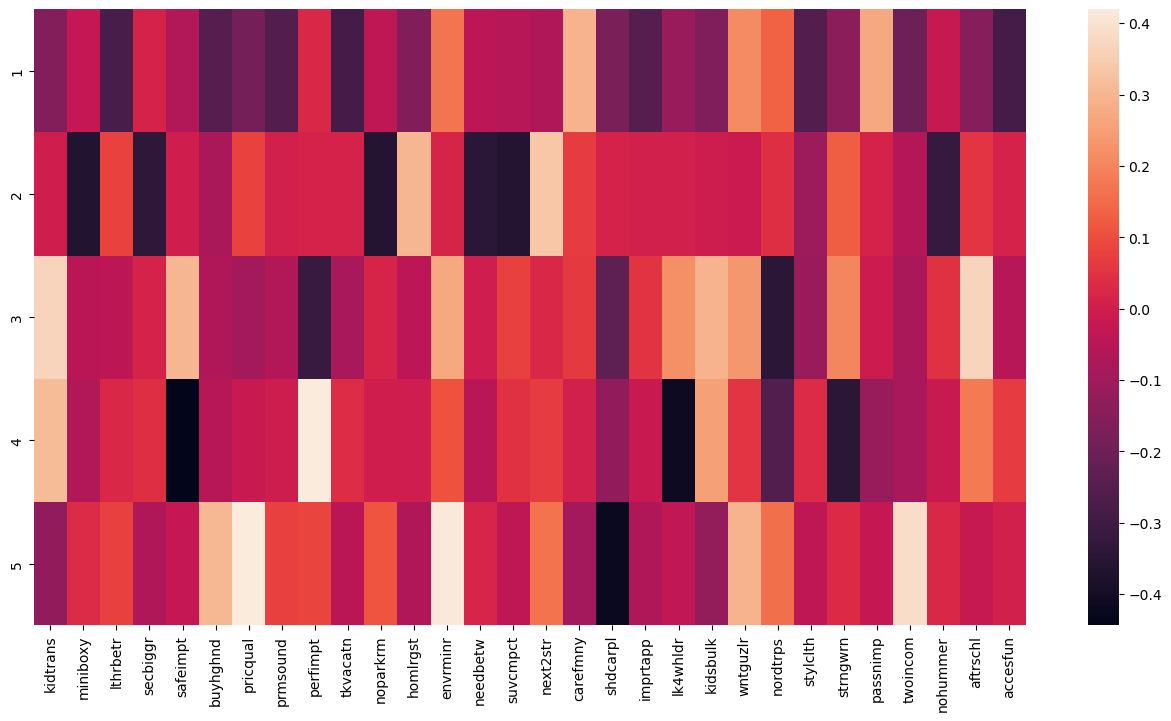

In [32]:
import seaborn as sns

plt.figure(figsize = (16, 8))
sns.heatmap(data =  df_composicao_componentes, yticklabels = df_composicao_componentes.index+1)

PAra facilitar o entendimento posterior, podemos criar "nomes para os componentes de acordo com suas caracteristidcas, o que vai auxiliar em análises posteriores.
- Componente 1: **Murrinhas sem férias!**
- Componente 2: **Gostamos de carros apertados!**
- Componente 3: **Familia é o que interessa!**
- Componente 4: **Velozes e Furiosos!**
- Componente 5: **Pago caro por carro bom e não ligo para poluição!**

Apesar dos nomes, é importante reconhecer caracteristicas dos componentes para embasar campanhas de marketing. Entender os componentes faz com que tenhamos noção de quais variaveis tem variabilidade semelhante, o que, em questionatios, aproxima aquelas variaveis que são mais similares.


Transfomando o dataframe original com os componetes criados:

In [35]:
componentes_principais_microvan = pca.transform(df_microvan.drop(colunas_demograficas, axis=1))
componentes_principais_microvan

array([[ 4.95739724, -0.630778  ,  0.25397408,  4.53413096,  0.4787577 ],
       [-0.42529226, -4.57730748, -2.68257259, -2.62292284, -0.50422577],
       [-4.20223653,  5.99835902,  2.46455968,  1.54782301, -2.41202492],
       ...,
       [-6.4115679 , -4.47822563, -6.6555251 , -0.29161379, -1.62472682],
       [-3.57270499, -5.5292335 ,  0.25267482,  2.61167859, -1.04362801],
       [ 4.05034892,  2.45977589,  3.75878157, -0.49039215,  0.74268315]])